In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls DRIVE/training/images

21_training.tif 25_training.tif 29_training.tif 33_training.tif 37_training.tif
22_training.tif 26_training.tif 30_training.tif 34_training.tif 38_training.tif
23_training.tif 27_training.tif 31_training.tif 35_training.tif 39_training.tif
24_training.tif 28_training.tif 32_training.tif 36_training.tif 40_training.tif


In [3]:
!ls DRIVE/training/mask
# We are not using masks because we can generate them using OTSU ourselves too for ROI

21_training_mask.gif 28_training_mask.gif 35_training_mask.gif
22_training_mask.gif 29_training_mask.gif 36_training_mask.gif
23_training_mask.gif 30_training_mask.gif 37_training_mask.gif
24_training_mask.gif 31_training_mask.gif 38_training_mask.gif
25_training_mask.gif 32_training_mask.gif 39_training_mask.gif
26_training_mask.gif 33_training_mask.gif 40_training_mask.gif
27_training_mask.gif 34_training_mask.gif


### Reading image

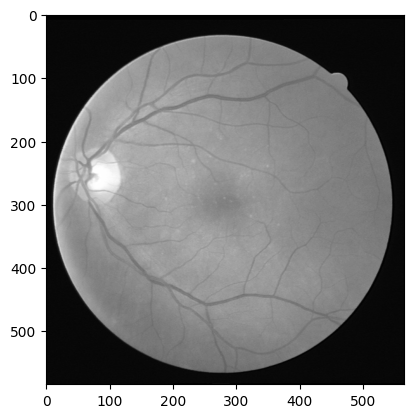

In [4]:
img = cv.imread("DRIVE/training/images/21_training.tif")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

### Green channel extraction

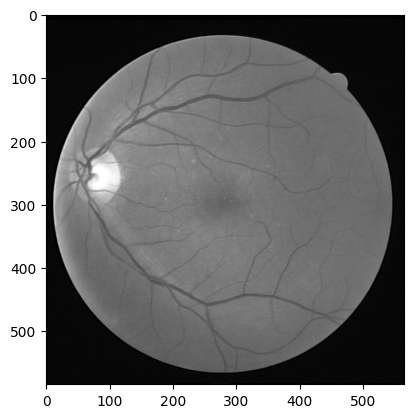

In [5]:
b, g, r = cv.split(img)
img_green = g
plt.imshow(img_green, cmap="gray")

### ROI Extraction (OTSU)

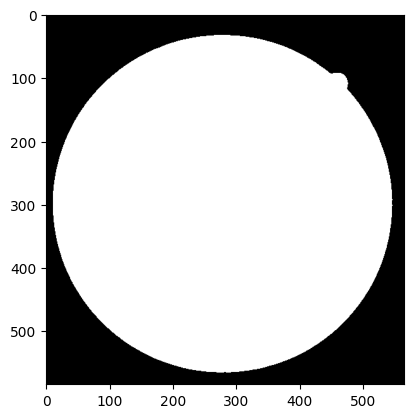

In [6]:
blur = cv.GaussianBlur(img_green,(5,5),0)
_,mask = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(mask, cmap="gray")

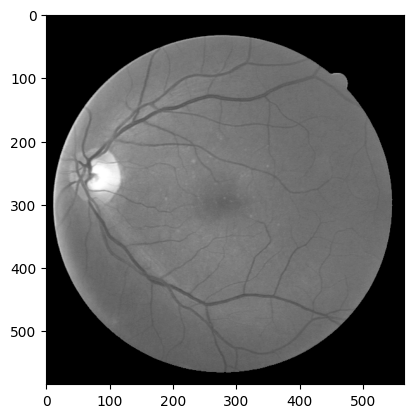

In [7]:
img_mask = cv.bitwise_and(img_green,img_green, mask=mask)
plt.imshow(img_mask, cmap="gray")

### CLAHE Histogram Equalisation

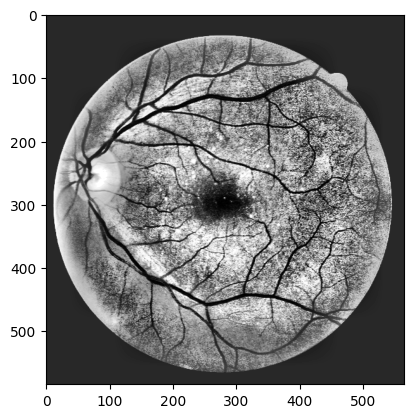

In [8]:
clahe = cv.createCLAHE()
img_clahe = clahe.apply(img_mask)
plt.imshow(img_clahe, cmap="gray")

### Image Normalization

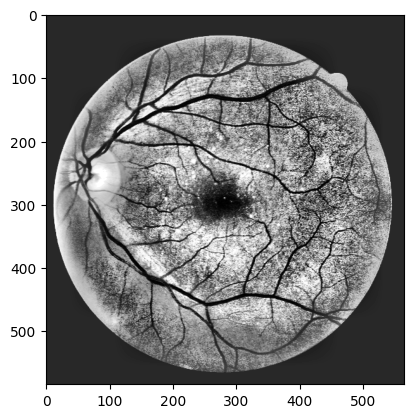

In [9]:
img_norm = cv.normalize(img_clahe,None, 0, 255,cv.NORM_MINMAX)
plt.imshow(img_norm, cmap="gray")